In [3]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

In [22]:
digits = load_digits()

Accuracy: 0.09


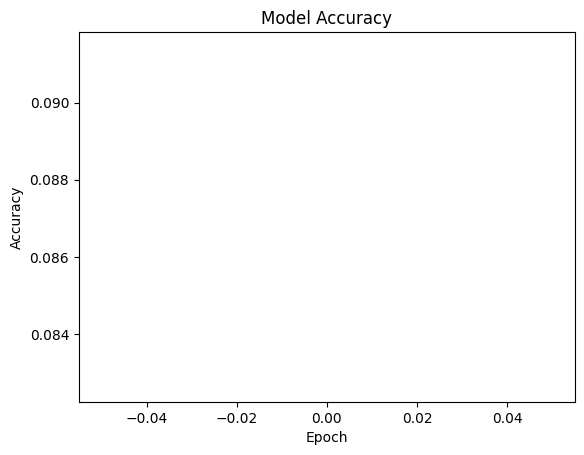

In [23]:
# Normalize the input data
X = digits.data / 16.0

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, digits.target, test_size=0.3)

# Define the neural network architecture
input_size = X_train.shape[1]
hidden_size = 16
output_size = len(np.unique(y_train))

# Initialize the weights
W1 = np.random.randn(input_size, hidden_size)
W2 = np.random.randn(hidden_size, output_size)

# Define the activation function (tanh)
def tanh(x):
    return np.tanh(x)

# Define the derivative of the activation function (tanh)
def tanh_derivative(x):
    return 1 - np.tanh(x)**2

# Train the model
learning_rate = 0.1
num_epochs = 1000

for epoch in range(num_epochs):
    # Forward pass
    hidden_layer = tanh(np.dot(X_train, W1))
    output_layer = tanh(np.dot(hidden_layer, W2))

    # Backward pass
    output_layer_error = output_layer - y_train.reshape(-1, 1)
    output_layer_delta = output_layer_error * tanh_derivative(output_layer)
    hidden_layer_error = np.dot(output_layer_delta, W2.T)
    hidden_layer_delta = hidden_layer_error * tanh_derivative(hidden_layer)

    # Update the weights
    W2 -= learning_rate * np.dot(hidden_layer.T, output_layer_delta)
    W1 -= learning_rate * np.dot(X_train.T, hidden_layer_delta)

# Test the model
hidden_layer = tanh(np.dot(X_test, W1))
output_layer = tanh(np.dot(hidden_layer, W2))
predictions = np.argmax(output_layer, axis=1)

# Compute the accuracy
accuracy = np.mean(predictions == y_test)
print(f"Accuracy: {accuracy:.2f}")

# Plot the accuracy
plt.plot(accuracy)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.show()


Epoch 0: Accuracy 0.13
Epoch 100: Accuracy 0.12


/var/folders/72/qgc4d5hn6gbd_wvdpljxwhwm0000gn/T/ipykernel_18857/4222974921.py:20: RuntimeWarning: overflow encountered in exp
  exp_scores = np.exp(x)
/var/folders/72/qgc4d5hn6gbd_wvdpljxwhwm0000gn/T/ipykernel_18857/4222974921.py:21: RuntimeWarning: invalid value encountered in divide
  return exp_scores / np.sum(exp_scores, axis=1, keepdims=True)


Epoch 200: Accuracy 0.12
Epoch 300: Accuracy 0.12
Epoch 400: Accuracy 0.12
Epoch 500: Accuracy 0.12
Epoch 600: Accuracy 0.12
Epoch 700: Accuracy 0.12
Epoch 800: Accuracy 0.12
Epoch 900: Accuracy 0.12


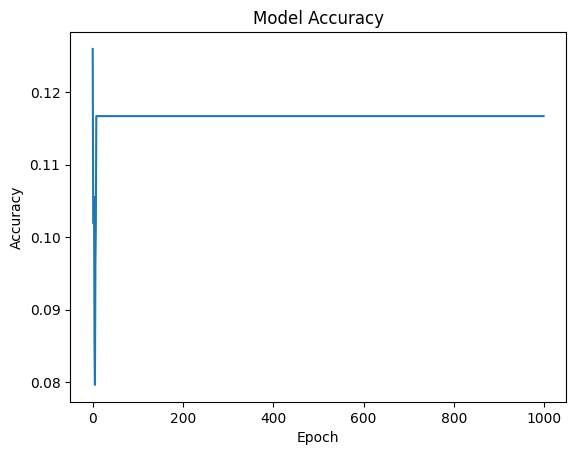

In [12]:
# Define the neural network architecture
input_size = X_train.shape[1]
hidden_size = 16
output_size = len(np.unique(y_train))

# Initialize the weights
W1 = np.random.randn(input_size, hidden_size)
W2 = np.random.randn(hidden_size, output_size)

# Define the activation function (tanh)
def tanh(x):
    return np.tanh(x)

# Define the derivative of the activation function (tanh)
def tanh_derivative(x):
    return 1 - np.tanh(x)**2

# Define the softmax function
def softmax(x):
    exp_scores = np.exp(x)
    return exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

# Define the cross-entropy loss function
def cross_entropy_loss(y_true, y_pred):
    num_examples = len(y_true)
    y_pred = np.clip(y_pred, 1e-15, 1 - 1e-15) # clip to prevent log(0)
    loss = -np.sum(y_true * np.log(y_pred)) / num_examples
    return loss

# Train the model
learning_rate = 0.1
num_epochs = 1000

accuracy_history = []

for epoch in range(num_epochs):
    # Forward pass
    hidden_layer = tanh(np.dot(X_train, W1))
    output_layer = softmax(np.dot(hidden_layer, W2))

    # Backward pass
    output_layer_error = output_layer - np.eye(output_size)[y_train]
    output_layer_delta = output_layer_error
    hidden_layer_error = np.dot(output_layer_delta, W2.T) * tanh_derivative(hidden_layer)
    hidden_layer_delta = hidden_layer_error

    # Update the weights
    W2 -= learning_rate * np.dot(hidden_layer.T, output_layer_delta)
    W1 -= learning_rate * np.dot(X_train.T, hidden_layer_delta)

    # Compute the accuracy
    hidden_layer = tanh(np.dot(X_test, W1))
    output_layer = softmax(np.dot(hidden_layer, W2))
    predictions = np.argmax(output_layer, axis=1)
    accuracy = np.mean(predictions == y_test)
    accuracy_history.append(accuracy)

    # Print the current epoch and accuracy
    if epoch % 100 == 0:
        print(f"Epoch {epoch}: Accuracy {accuracy:.2f}")

# Plot the accuracy history
plt.plot(accuracy_history)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.show()



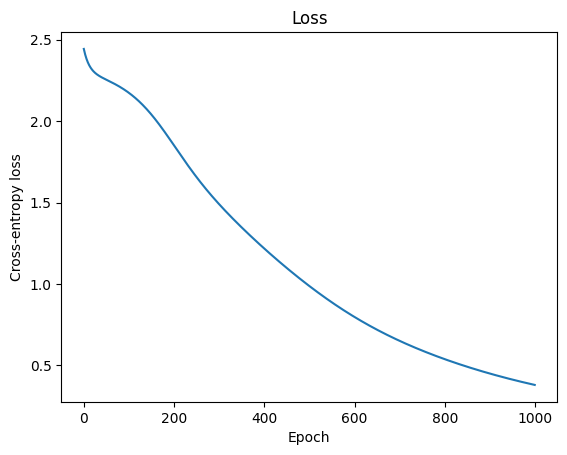

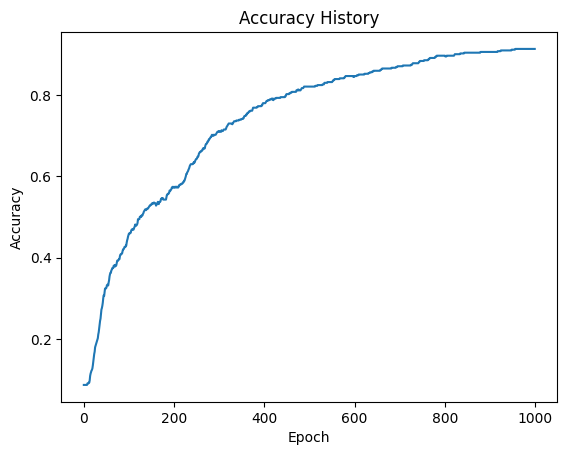

In [33]:
# Define the neural network architecture
input_size = X_train.shape[1] # 64 (8x8 image)
hidden_size1 = 32
hidden_size2 = 16
output_size = len(np.unique(y_train)) # 10 (0-9 digits)

# Initialize the weights
W1 = np.random.randn(input_size, hidden_size1) / np.sqrt(input_size)
b1 = np.zeros(hidden_size1)
W2 = np.random.randn(hidden_size1, hidden_size2) / np.sqrt(hidden_size1)
b2 = np.zeros(hidden_size2)
W3 = np.random.randn(hidden_size2, output_size) / np.sqrt(hidden_size2)
b3 = np.zeros(output_size)

# Define the activation functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return np.tanh(x)

# Define the forward pass function
def forward(X):
    # First hidden layer
    z1 = np.dot(X, W1) + b1
    a1 = tanh(z1)

    # Second hidden layer
    z2 = np.dot(a1, W2) + b2
    a2 = sigmoid(z2)

    # Output layer
    z3 = np.dot(a2, W3) + b3
    exp_z3 = np.exp(z3)
    probs = exp_z3 / np.sum(exp_z3, axis=1, keepdims=True)

    return probs

# Define the cross-entropy loss function
def cross_entropy_loss(probs, y):
    N = len(y)
    log_probs = -np.log(probs[range(N), y])
    loss = np.sum(log_probs) / N
    return loss

# Define the backward pass function
def backward(X, y, probs):
    N = len(y)
    d3 = probs
    d3[range(N), y] -= 1
    z1 = np.dot(X, W1) + b1
    a1 = tanh(z1)
    z2 = np.dot(a1, W2) + b2
    a2 = sigmoid(z2)

    dW3 = np.dot(a2.T, d3) / N
    db3 = np.sum(d3, axis=0) / N

    da2 = np.dot(d3, W3.T)
    dz2 = da2 * (a2 * (1 - a2))
    dW2 = np.dot(a1.T, dz2) / N
    db2 = np.sum(dz2, axis=0) / N

    da1 = np.dot(dz2, W2.T)
    dz1 = da1 * (1 - a1 ** 2)
    dW1 = np.dot(X.T, dz1) / N
    db1 = np.sum(dz1, axis=0) / N

    return dW1, db1, dW2, db2, dW3, db3

# Define the training function

# Initialize the losses list for plotting
losses = []
accuracy_history = []
learning_rate = 0.1
epochs = 1000
for i in range(epochs):
        # Forward pass
    probs = forward(X_train)
    loss = cross_entropy_loss(probs, y_train)
    losses.append(loss)

    # Backward pass
    dW1, db1, dW2, db2, dW3, db3 = backward(X_train, y_train, probs)

    # Update the weights and biases
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2
    W3 -= learning_rate * dW3
    b3 -= learning_rate * db3
   
    probs = forward(X_test)
    predictions = np.argmax(probs, axis=1)
    accuracy = np.mean(predictions == y_test)
    accuracy_history.append(accuracy)

# Plot the loss over time
plt.plot(losses)
plt.title("Loss")
plt.xlabel("Epoch")
plt.ylabel("Cross-entropy loss")
plt.show()

plt.plot(range(num_epochs), accuracy_history)
plt.title("Accuracy History")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.show()




